# **CS224W - Colab 4**


![test](https://drive.google.com/uc?id=1-P0QFkURX6LPEFbQcPQ-mpFIOHm_KAZ7)

![test](https://drive.google.com/uc?id=1UduuYHHfb_b8vlXkbbHrNsW47-HqfLte)

## Setup
First let us check which version of PyTorch you are running

In [28]:
import torch
import os
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.4.0


In [29]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  import torch
  import torch_geometric
  print(torch.__version__)
  print(torch_geometric.__version__)

2.4.0
2.6.1


# 1) DeepSNAP Heterogeneous Graph


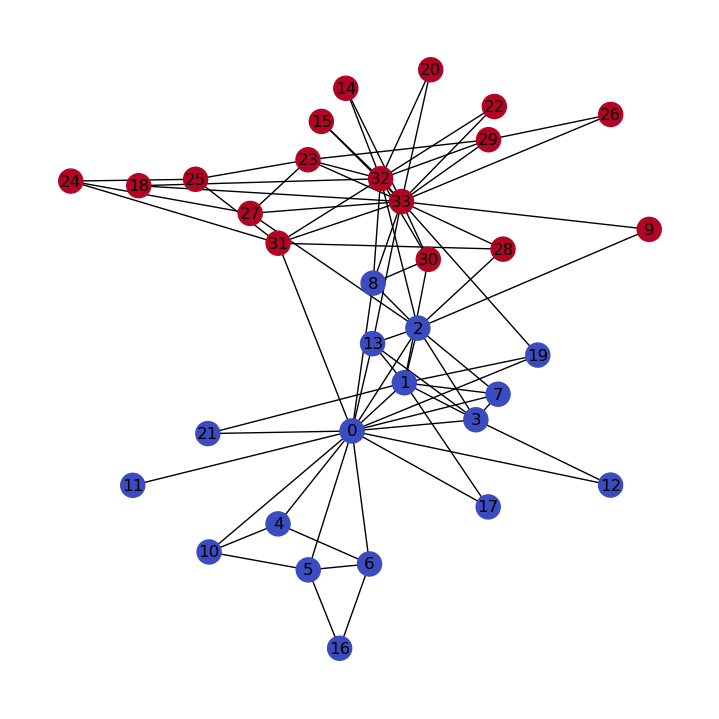

In [30]:
import networkx as nx #  a library for creating and manipulating complex networks.
from networkx.algorithms.community import greedy_modularity_communities # imports a community detection algorithm. NOT used in this code.
import matplotlib.pyplot as plt
import copy

if 'IS_GRADESCOPE_ENV' not in os.environ:
  from pylab import show
  G = nx.karate_club_graph() # Loads the famous Zachary's Karate Club graph, which is a social network of friendships between 34 members of a karate club.
  
  community_map = {} #  Initializes a dictionary to map nodes to communities.
  
  for node in G.nodes(data=True): # Iterates over all nodes in the graph, including node data.
    
    if node[1]["club"] == "Mr. Hi": #Checks if the node belongs to the "Mr. Hi" club.
      
      community_map[node[0]] = 0 # Assigns community 0 to nodes in "Mr. Hi" club.
    else:
      community_map[node[0]] = 1 # Assigns community 1 to nodes in "Officer" club.
      
  node_color = [] # Initializes a list for node colors.
  color_map = {0: 0, 1: 1} #Maps community labels to color codes.
  node_color = [color_map[community_map[node]] for node in G.nodes()] #Creates a list of colors for each node based on their community.
  pos = nx.spring_layout(G)
  plt.figure(figsize=(7, 7))
  nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color, with_labels = True)
  show()

![test](https://drive.google.com/uc?id=1_p0c-IJAXTWjym1T9yry-RSpVxS9OudP)

# Assigning Node Labels and Features



In [31]:
import torch

def assign_node_types(G, community_map):
  
  node_types = {} # Initializes a dictionary to hold the node types.
  for node in G.nodes(): #Iterates over all nodes in the graph.
    node_types[node] = "n0" if community_map[node] == 0 else "n1" 
    # Assigns the node type:
    # If the node is in community 0 ("Mr. Hi" club), assigns "n0".
    # If the node is in community 1 ("Officer" club), assigns "n1".
  
  print("Before assign_node_types", G.nodes[0])
  nx.classes.function.set_node_attributes(G , node_types, 'node_type') #Uses NetworkX's set_node_attributes function to add the 'node_type' attribute to each node in G based on the node_types dictionary.
  print("After assign_node_types", G.nodes[0])
  

def assign_node_labels(G, community_map):
  #The function assign_node_labels adds a 'node_label' attribute to each node in the graph G based on the community_map.
  print("\nBefore assign_node_labels", G.nodes[0])
  
  nx.classes.function.set_node_attributes(G , community_map, 'node_label')
  # Uses NetworkX's set_node_attributes function to add the 'node_label' attribute to each node.
  # community_map is a dictionary mapping node IDs to labels (0 or 1).
  
  print("After assign_node_labels", G.nodes[0])

def assign_node_features(G):
  # Adds a 'node_feature' attribute to each node in G, assigning each node the same feature vector [1., 1., 1., 1., 1.].
  print("\nBefore assign_node_features", G.nodes[0])
  nx.classes.function.set_node_attributes(G , torch.ones(5), 'node_feature')
  print("After assign_node_features", G.nodes[0])
  

if 'IS_GRADESCOPE_ENV' not in os.environ:
  assign_node_types(G, community_map)
  assign_node_labels(G, community_map)
  assign_node_features(G)

  # Explore node properties for the node with id: 20
  node_id = 20
  print (f"\nNode {node_id} has properties:", G.nodes(data=True)[node_id])


Before assign_node_types {'club': 'Mr. Hi'}
After assign_node_types {'club': 'Mr. Hi', 'node_type': 'n0'}

Before assign_node_labels {'club': 'Mr. Hi', 'node_type': 'n0'}
After assign_node_labels {'club': 'Mr. Hi', 'node_type': 'n0', 'node_label': 0}

Before assign_node_features {'club': 'Mr. Hi', 'node_type': 'n0', 'node_label': 0}
After assign_node_features {'club': 'Mr. Hi', 'node_type': 'n0', 'node_label': 0, 'node_feature': tensor([1., 1., 1., 1., 1.])}

Node 20 has properties: {'club': 'Officer', 'node_type': 'n1', 'node_label': 1, 'node_feature': tensor([1., 1., 1., 1., 1.])}


# Assigning Edge Types






In [32]:
def assign_edge_types(G, community_map):
  #Assigns 'edge_type' attributes to edges based on the communities of connected nodes.
  
  # - "e0": Edge between two nodes in community 0 (Mr. Hi's club)
  # - "e1": Edge between two nodes in community 1 (Officer's club) 
  # - "e2": Edge between nodes from different communities (cross-community edge)
  
  edge_community = {} #initializes a dictionary to store edge types.
  
  for e1,e2 in G.edges(): # Loops through all edges.
    
    if community_map[e1] == 0 and community_map[e2] == 0: # Both nodes in community 0
      edge_community[(e1,e2)] = "e0"
    elif  community_map[e1] == 1 and community_map[e2] == 1: # Both nodes in community 1
      edge_community[(e1,e2)] = "e1"
    else:
       edge_community[(e1,e2)] = "e2"  # Nodes in different communities
        
  print("Before assign_edge_types", G.edges[0,31])
  nx.classes.function.set_edge_attributes(G , edge_community, 'edge_type')
  print("After assign_edge_types", G.edges[0,31])

if 'IS_GRADESCOPE_ENV' not in os.environ:
  assign_edge_types(G, community_map)

  # Explore edge properties for a sampled edge and check the corresponding
  # node types
  edge_idx = 15
  n1 = 0
  n2 = 31
  edge = list(G.edges(data=True))[edge_idx]
  print (f"\nEdge ({edge[0]}, {edge[1]}) has properties:", edge[2])
  print (f"Node {n1} has properties:", G.nodes(data=True)[n1])
  print (f"Node {n2} has properties:", G.nodes(data=True)[n2])

Before assign_edge_types {'weight': 2}
After assign_edge_types {'weight': 2, 'edge_type': 'e2'}

Edge (0, 31) has properties: {'weight': 2, 'edge_type': 'e2'}
Node 0 has properties: {'club': 'Mr. Hi', 'node_type': 'n0', 'node_label': 0, 'node_feature': tensor([1., 1., 1., 1., 1.])}
Node 31 has properties: {'club': 'Officer', 'node_type': 'n1', 'node_label': 1, 'node_feature': tensor([1., 1., 1., 1., 1.])}


## Heterogeneous Graph Visualization

Now we can visualize the Heterogeneous Graph we have generated.
### Assigning Edge Colors:
- Edges within "Mr. Hi" club: 'blue'
- Edges within "Officer" club: 'red'
- Edges between clubs: 'green'


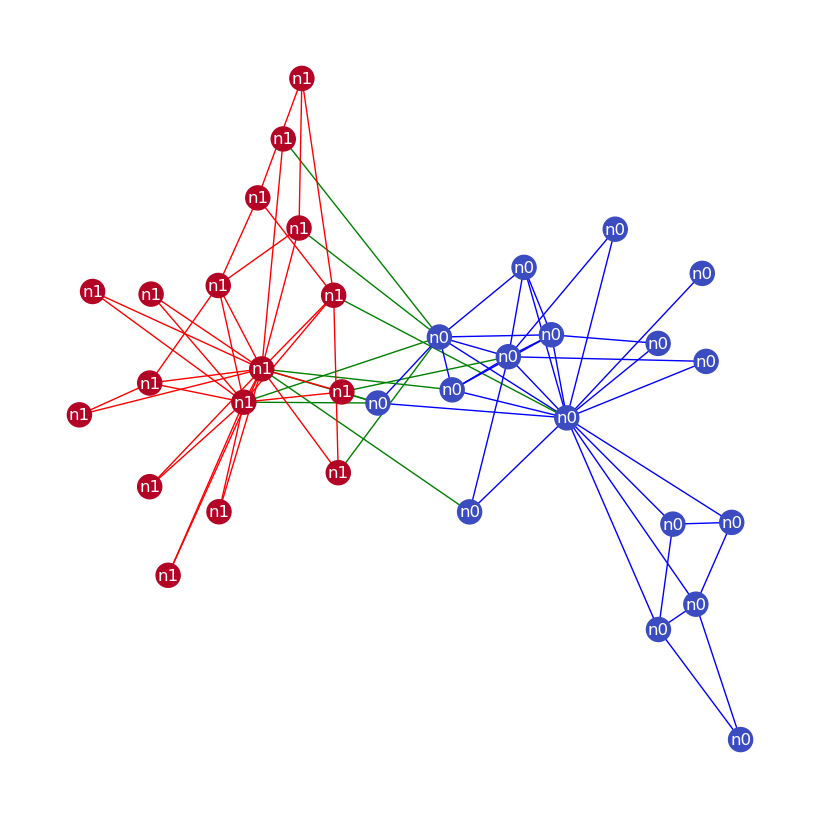

In [23]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  edge_color = {} #initializes a dictionary to store edge colors.
  for edge in G.edges(): # Loops through all edges.
    n1, n2 = edge
    edge_color[edge] = community_map[n1] if community_map[n1] == community_map[n2] else 2
    if community_map[n1] == community_map[n2] and community_map[n1] == 0:
      edge_color[edge] = 'blue'
    elif community_map[n1] == community_map[n2] and community_map[n1] == 1:
      edge_color[edge] = 'red'
    else:
      edge_color[edge] = 'green'

  G_orig = copy.deepcopy(G) # Creates a deep copy of the graph G.
  nx.classes.function.set_edge_attributes(G, edge_color, name='color') # Sets the edge colors in the graph G.
  colors = nx.get_edge_attributes(G,'color').values() # Retrieves the values of the 'color' edge attribute.
  labels = nx.get_node_attributes(G, 'node_type') # Retrieves the node type labels.
  plt.figure(figsize=(8, 8))
  nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color, edge_color=colors, labels=labels, font_color='white')
  show()

## Transforming to DeepSNAP representation



In [24]:
from deepsnap.hetero_graph import HeteroGraph

if 'IS_GRADESCOPE_ENV' not in os.environ:
  hete = HeteroGraph(G_orig) # Transforms the NetworkX object G_orig into a DeepSNAP HeteroGraph.
  print(hete) # Prints the HeteroGraph object.

HeteroGraph(G=[], club=[], edge_index=[], edge_label_index=[], edge_to_graph_mapping=[], edge_to_tensor_mapping=[78], edge_type=[], name=[], node_feature=[], node_label=[], node_label_index=[], node_to_graph_mapping=[], node_to_tensor_mapping=[34], node_type=[], weight=[])


![test](https://drive.google.com/uc?id=1b4soVCzldELRJW9ubhydukrrnynO73AX)

<!-- ![test](/Users/ahmedalkhulayfi/Documents/Stanford/Labs/Lab04/Presantion/images/Attributes.jpg) -->

## Question 1.3: How many nodes are of each type (2.5 Points)


In [34]:
def get_nodes_per_type(hete):
  
  num_nodes_n0 = 0
  num_nodes_n1 = 0
  
  num_nodes_n0 = len(hete.node_type["n0"]) #List of nodes of type 'n0'.
  num_nodes_n1 = len(hete.node_type["n1"]) #List of nodes of type 'n1'.

  return num_nodes_n0, num_nodes_n1

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_nodes_n0, num_nodes_n1 = get_nodes_per_type(hete)
  print("Node type n0 has {} nodes".format(num_nodes_n0))
  print("Node type n1 has {} nodes".format(num_nodes_n1))

Node type n0 has 17 nodes
Node type n1 has 17 nodes


## Counting Edges per Message Type



In [11]:
def get_num_message_edges(hete):
 
  message_type_edges = []
  
  
  for message_type in hete.message_types: #hete.message_types: List of all message types.
    
    num_edge = len(hete.edge_type[message_type]) # Number of edges for the current message type.
    message_type_edges.append((message_type , num_edge)) 

  return message_type_edges

if 'IS_GRADESCOPE_ENV' not in os.environ:
  message_type_edges = get_num_message_edges(hete)
  for (message_type, num_edges) in message_type_edges:
    print("Message type {} has {} edges".format(message_type, num_edges))

Message type ('n0', 'e0', 'n0') has 35 edges
Message type ('n0', 'e2', 'n1') has 11 edges
Message type ('n1', 'e1', 'n1') has 32 edges


## Dataset Splitting and Counting Labeled Nodes

In [12]:
from deepsnap.dataset import GraphDataset

def compute_dataset_split_counts(datasets):
  
  data_set_splits = {} # Initializes a dictionary to store the number of labeled nodes for each dataset split.
  
  for dataset_name in datasets: # Iterates over each dataset split.
    data_set_splits[dataset_name] = len(datasets[dataset_name][0].node_label_index["n0"]) +  len(datasets[dataset_name][0].node_label_index["n1"])
    # Sum of labeled nodes for both node types in the current dataset split.

  return data_set_splits

if 'IS_GRADESCOPE_ENV' not in os.environ:
  dataset = GraphDataset([hete], task='node')
  # Splitting the dataset
  dataset_train, dataset_val, dataset_test = dataset.split(transductive=True, split_ratio=[0.4, 0.3, 0.3])
                                            #transductive=True: All splits share the same graph structure.
                                            
                                            
  datasets = {'train': dataset_train, 'val': dataset_val, 'test': dataset_test}

  data_set_splits = compute_dataset_split_counts(datasets)
  for dataset_name, num_nodes in data_set_splits.items():
    print("{} dataset has {} nodes".format(dataset_name, num_nodes))

train dataset has 12 nodes
val dataset has 10 nodes
test dataset has 12 nodes


## DeepSNAP Dataset Visualization



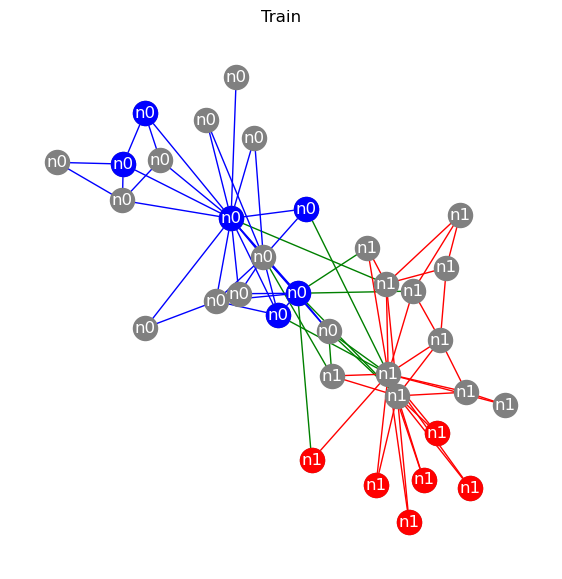

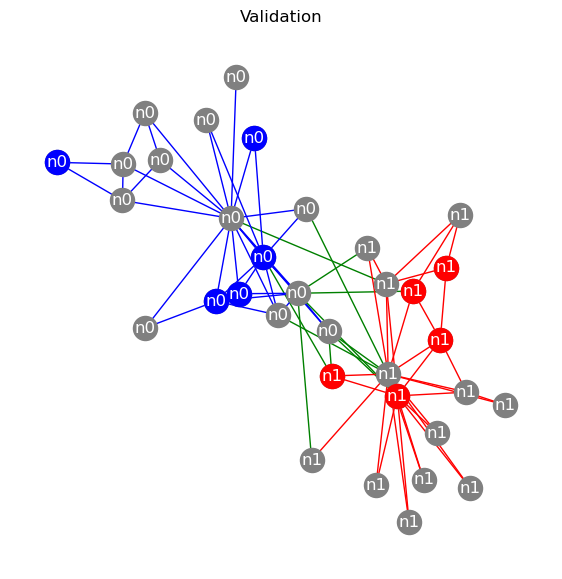

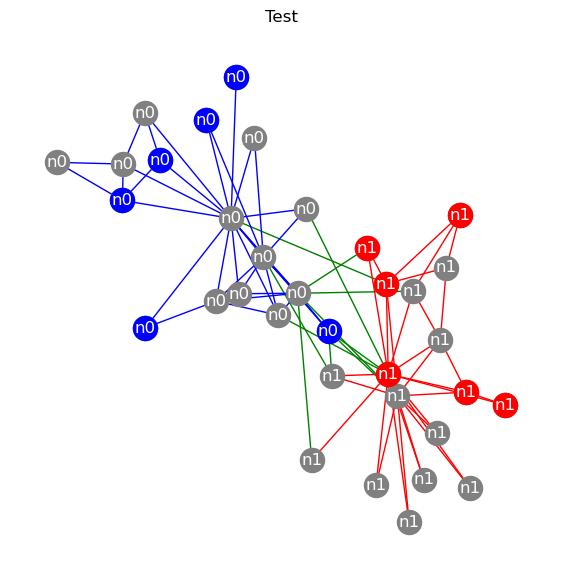

In [13]:
from deepsnap.dataset import GraphDataset

if 'IS_GRADESCOPE_ENV' not in os.environ:
  dataset = GraphDataset([hete], task='node')
  # Splitting the dataset
  dataset_train, dataset_val, dataset_test = dataset.split(transductive=True, split_ratio=[0.4, 0.3, 0.3])
  titles = ['Train', 'Validation', 'Test']

  for i, dataset in enumerate([dataset_train, dataset_val, dataset_test]):
    n0 = hete._convert_to_graph_index(dataset[0].node_label_index['n0'], 'n0').tolist()
    n1 = hete._convert_to_graph_index(dataset[0].node_label_index['n1'], 'n1').tolist()

    plt.figure(figsize=(7, 7))
    plt.title(titles[i])
    nx.draw(G_orig, pos=pos, node_color="grey", edge_color=colors, labels=labels, font_color='white')
    nx.draw_networkx_nodes(G_orig.subgraph(n0), pos=pos, node_color="blue")
    nx.draw_networkx_nodes(G_orig.subgraph(n1), pos=pos, node_color="red")
    show()

# 2) Heterogeneous Graph Node Property Prediction
![test](https://drive.google.com/uc?id=1Ku_5jniJkZTrd_IR8zhdo26UiXuEInNK)


![test](https://drive.google.com/uc?id=1Ib0owhjf32TQ2kELxUGzCKcZvpjl_Gr9)


![test](https://drive.google.com/uc?id=14QlinRgGFkn9E5uQprovB4qIR1Jnk_O6)

In [14]:
import copy
import torch
import deepsnap
import random
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.nn as pyg_nn

from sklearn.metrics import f1_score
from deepsnap.hetero_gnn import forward_op
from deepsnap.hetero_graph import HeteroGraph
from torch_sparse import SparseTensor, matmul

## Implementing `HeteroGNNConv`



You will begin by defining the `HeteroGNNConv` layer with respect to message type $m$:

\begin{equation}
m =(s, r, d)
\end{equation}


\begin{equation}
h_v^{(l)[m]} = W^{(l)[m]} \cdot \text{CONCAT} \Big( W_d^{(l)[m]} \cdot h_v^{(l-1)}, W_s^{(l)[m]} \cdot AGG(\{h_u^{(l-1)}, \forall u \in N_{m}(v) \})\Big)
\end{equation}

where you compute $h_v^{(l)[m]}$, the node embedding representation for node $v$ after `HeteroGNNConv` layer $l$ with respect message type $m$. Further unpacking the formula:
- $h_v^{(l)[m]}$  Updated embedding of node $v$ at layer $l$ for message type $m$.

- $W_d^{(l)[m]}$  Weight matrix for the destination node type.

- $W_s^{(l)[m]}$  Weight matrix for the source node type.

- $W^{(l)[m]}$  Weight matrix for combining the concatenated embeddings.

- $N_m(v)$  Neighbors of node $v$ under message type $m$.

- **AGG**  Aggregation function (mean in our case).




Lastly, for simplicity, we use mean aggregations for $AGG$ where:

\begin{equation}
AGG(\{h_u^{(l-1)}, \forall u \in N_{m}(v) \}) = \frac{1}{|N_{m}(v)|} \sum_{u\in N_{m}(v)} h_u^{(l-1)}
\end{equation}

### **Explanation with the ACM Dataset**

Let's focus on a single paper node, say **Paper A**.

- **Neighbors via "author" relation:** Papers that share authors with **Paper A**.
- **Neighbors via "subject" relation:** Papers that are about the same subject as **Paper A**.

**Message Passing Steps for "author" Relation:**

1. **Gather Messages:**
   - Collect embeddings from neighboring papers connected via the "author" relation.

2. **Aggregate Messages:**
   - Compute the mean of the neighbor embeddings.

3. **Transform Aggregated Messages:**
   - Apply a linear transformation $( W_s^{(l)["author"]} $) to the aggregated messages.

4. **Transform Self-Embedding:**
   - Apply a linear transformation $( W_d^{(l)["author"]} $) to **Paper A**'s current embedding.

5. **Combine and Update:**
   - Concatenate the transformed self-embedding and aggregated messages.
   - Apply another linear transformation $( W^{(l)["author"]} $) to produce the updated embedding $( h_{\text{Paper A}}^{(l)["author"]} $).

**Repeat the same steps for the "subject" relation.**

In [17]:
class HeteroGNNConv(pyg_nn.MessagePassing):
    def __init__(self, in_channels_src, in_channels_dst, out_channels):
        super(HeteroGNNConv, self).__init__(aggr="mean")

        self.in_channels_src = in_channels_src
        self.in_channels_dst = in_channels_dst
        self.out_channels = out_channels

        # Corresponds to W_d in the equation
        self.lin_dst = nn.Linear(in_features=self.in_channels_src , out_features=self.out_channels )
        
        # Corresponds to W_s in the equation
        self.lin_src = nn.Linear(in_features=self.in_channels_dst , out_features=self.out_channels )

        # Corresponds to W in the equation
        self.lin_update = nn.Linear(in_features=  2* self.out_channels , out_features=self.out_channels )

       

    def forward(self,node_feature_src,node_feature_dst,edge_index,size=None):
        # Initiates the message passing process
        # node_feature_src: h_u^{(l-1)} for source nodes u
        # node_feature_dst: h_v^{(l-1)} for destination nodes v
        return self.propagate(edge_index, size=size,node_feature_src=node_feature_src, node_feature_dst=node_feature_dst)
    
    

    def message_and_aggregate(self, edge_index, node_feature_src):
        # Efficiently computes AGG({ h_u^{(l-1)} | u in N_m(v) }) using sparse matrix multiplication
        # This performs the aggregation step in the message passing
       
        out = matmul(edge_index, node_feature_src, reduce=self.aggr)

        return out
    
        

    def update(self, aggr_out, node_feature_dst):
        # Applies W_s to the aggregated messages
        aggr_out = self.lin_src(aggr_out)
        # aggr_out now represents W_s * AGG({ h_u^{(l-1)} })
        
        # Applies W_d^{(l)[m]} to the destination node features
        node_feature_dst = self.lin_dst(node_feature_dst)
        # node_feature_dst now represents W_d * h_v^{(l-1)}
        
        # Concatenates the transformed destination features and the transformed aggregated messages
        concatenated = torch.cat([node_feature_dst,aggr_out], dim=-1)
        # concatenated represents CONCAT( W_d * h_v^{(l-1)}, W_s* AGG({ h_u^{(l-1)} }) )

        # Applies W to the concatenated features to get the updated node embedding
        aggr_out = self.lin_update(concatenated)
        # out now represents h_v^{(l)[m]} = W * CONCAT(...)
        

        return aggr_out


![test](https://drive.google.com/uc?id=1JAA5yzoIKqfyjBVIvX8saaVa30vvAy93)

## **Implementing `HeteroGNNWrapperConv`**

### **Purpose**

- Aggregates the outputs from multiple `HeteroGNNConv` layers (one per message type) to produce the final updated embeddings for each node type.

### **Aggregation Methods**

- **Mean Aggregation:** Simply averages the embeddings from different message types.
- **Attention Aggregation:** Learns weights (attention scores) for each message type to combine them intelligently.

### **Example with **Paper A****

Assuming we have obtained two embeddings for **Paper A**:

- $ h_{\text{Paper A}}^{(l)["author"]} $: Updated embedding from the "author" relation.
- $ h_{\text{Paper A}}^{(l)["subject"]} $: Updated embedding from the "subject" relation.

**Mean Aggregation:**

$
h_{\text{Paper A}}^{(l)} = \frac{1}{2} \left( h_{\text{Paper A}}^{(l)["author"]} + h_{\text{Paper A}}^{(l)["subject"]} \right)
$

**Attention Aggregation:**

1. **Compute Attention Scores:**

   For each message type \( m \):

   $
   e_{m} = \frac{1}{|V|} \sum_{v \in V} q^\top \tanh \left( W_{\text{attn}} h_v^{(l)[m]} + b \right)
   $

   - $ e_{\text{"author"}} $: Attention score for the "author" relation.
   - $ e_{\text{"subject"}} $: Attention score for the "subject" relation.

2. **Normalize Attention Scores:**

   $
   \alpha_{m} = \frac{\exp(e_{m})}{\sum_{m'} \exp(e_{m'})}
   $

3. **Aggregate Embeddings:**

   $
   h_{\text{Paper A}}^{(l)} = \sum_{m} \alpha_{m} h_{\text{Paper A}}^{(l)[m]}
   $

   - The final embedding is a weighted sum of the embeddings from each relation type, with weights determined by the attention scores.

---

## Heterogeneous GNN Wrapper Layer

The first one is simply mean aggregation over message types:

\begin{equation}
h_v^{(l)} = \frac{1}{M}\sum_{m=1}^{M}h_v^{(l)[m]}
\end{equation}



\begin{equation}
e_{m} = \frac{1}{|V_{d}|} \sum_{v \in V_{d}} q_{attn}^{(l)T} \cdot tanh \Big( W_{attn}^{(l)} \cdot h_v^{(l)[m]} + b \Big)
\end{equation}

\begin{equation}
\alpha_{m} = \frac{\exp(e_{m})}{\sum_{m=1}^M \exp(e_{m})}
\end{equation}

\begin{equation}
h_v^{(l)} = \sum_{m=1}^{M} \alpha_{m} \cdot h_v^{(l)[m]}
\end{equation}

, where we emphasize that $M$ here is the number of message types associated with the destination node type $d$. 


In [18]:
class HeteroGNNWrapperConv(deepsnap.hetero_gnn.HeteroConv):
    def __init__(self, convs, args, aggr=None):
        super(HeteroGNNWrapperConv, self).__init__(convs, None)
        self.aggr = aggr


        self.mapping = {}

        
        self.alpha = None

        self.attn_proj = None

        if self.aggr == "attn":
            # W_attn is the weight matrix for the attention mechanism
            # q_attn is the query vector for the attention mechanism
            # b is the bias vector for the attention mechanism
            self.attn_proj  = nn.Sequential(nn.Linear( args['hidden_size'] , args['attn_size'], bias=True), nn.Tanh(), nn.Linear(args['attn_size'], 1, bias=False))
            
            
    def reset_parameters(self):
        super(HeteroGNNWrapperConv, self).reset_parameters()
        if self.aggr == "attn":
            for layer in self.attn_proj.children():
                layer.reset_parameters()
    
    def forward(self, node_features, edge_indices):
        message_type_emb = {}
        for message_key, edge_index in edge_indices.items():
            src_type, edge_type, dst_type = message_key
            node_feature_src = node_features[src_type]
            node_feature_dst = node_features[dst_type]
            message_type_emb[message_key] = (
                self.convs[message_key](
                    node_feature_src,
                    node_feature_dst,
                    edge_index,
                )
            )
        node_emb = {dst: [] for _, _, dst in message_type_emb.keys()}
        mapping = {}        
        for (src, edge_type, dst), item in message_type_emb.items():
            mapping[len(node_emb[dst])] = (src, edge_type, dst)
            node_emb[dst].append(item)
        self.mapping = mapping
        for node_type, embs in node_emb.items():
            if len(embs) == 1:
                node_emb[node_type] = embs[0]
            else:
                node_emb[node_type] = self.aggregate(embs)
        return node_emb
    
    def aggregate(self, xs):
        # Input: xs, a list of embeddings from different message types for the same node type.
        
        
        M = len(xs) # Number of message types
        N = xs[0].shape[0] # Number of nodes
        F = xs[0].shape[1]  # Feature dimension
        
       
        if self.aggr == "mean":

            return torch.mean(torch.stack(xs, dim=0), dim=0)

        elif self.aggr == "attn":
            
            xs_stack = torch.stack(xs, dim=0)  # Shape: (M, N, F)
            M, N, F = xs_stack.shape
            xs_reshaped = xs_stack.view(M * N, F) # Flatten for attention computation
            
            
            attn_scores = self.attn_proj(xs_reshaped)  # Compute attention scores: Shape (M*N, 1)
            
            attn_scores = attn_scores.view(M, N)  # Reshape back to (M, N)
            
            # Compute unnormalized attention weights e_m
            e_m = torch.mean(attn_scores, dim=1) # Shape: (M,)
            
            # Normalize attention weights
            alpha = torch.softmax(e_m, dim=0) # Shape: (M,)
            
            alpha = alpha.view(M, 1, 1)  # Shape: (M, 1, 1)
            
            # Aggregate embeddings with attention weights
            h_v = torch.sum(alpha * xs_stack, dim=0)
            
            self.alpha = alpha.detach().cpu().numpy().squeeze()
            
            return h_v

## Initialize Heterogeneous GNN Layers



In [19]:
def generate_convs(hetero_graph, conv, hidden_size, first_layer=False):
    # Function Purpose:
    # Creates a dictionary of HeteroGNNConv layers for each message type.
    
    # Parameters:
    # hetero_graph: The heterogeneous graph.
    # conv: The convolution class (HeteroGNNConv).
    # hidden_size: The hidden layer size.
    # first_layer: Indicates whether it's the first layer (input dimensions differ).

    convs = {}

    
    message_types = hetero_graph.message_types
    for message_type in message_types: #Iterate Over Message Types
        src_node_type, edge_type, dst_node_type = message_type  #For each message type, extract source and destination node types.
        if first_layer:
            # First Layer:
            # Use the actual feature dimensions from the graph.
            in_channels_src = hetero_graph.num_node_features(src_node_type)
            in_channels_dst = hetero_graph.num_node_features(dst_node_type)
        else:
            # Subsequent Layers:
            # Use hidden_size as input dimensions.
            in_channels_src = hidden_size
            in_channels_dst = hidden_size
            
        # Initialize Convolutional Layer    
        convs[message_type] = conv(in_channels_src, in_channels_dst, hidden_size)
        

    return convs

## HeteroGNN


In [20]:
class HeteroGNN(torch.nn.Module):
    def __init__(self, hetero_graph, args, aggr="mean"):
        super(HeteroGNN, self).__init__()
        # Parameters:
        # hetero_graph: The heterogeneous graph object containing node features, labels, and edge indices.
        # args: Dictionary of arguments including hidden_size and other hyperparameters.
        # aggr: Aggregation method, either "mean" or "attn".

        self.aggr = aggr
        self.hidden_size = args['hidden_size']

        self.convs1 =  HeteroGNNWrapperConv(generate_convs(hetero_graph, HeteroGNNConv, self.hidden_size, first_layer=True),args,aggr=self.aggr)
        self.convs2 =  HeteroGNNWrapperConv(generate_convs(hetero_graph, HeteroGNNConv, self.hidden_size, first_layer=False),args,aggr=self.aggr)
        # self.convs1 and self.convs2: Two convolutional layers (HeteroGNNWrapperConv) representing layers l=1 and l=2.
       
        self.bns1 = nn.ModuleDict()
        self.bns2 = nn.ModuleDict()
        self.relus1 = nn.ModuleDict()
        self.relus2 = nn.ModuleDict()
        #self.post_mps: Output layers (fully connected linear layers) mapping from hidden size to the number of classes for each node type.
        self.post_mps = nn.ModuleDict()

        for node_type in hetero_graph.node_types:
           
            self.bns1[node_type] = torch.nn.BatchNorm1d(self.hidden_size, eps=1)
            self.bns2[node_type] = torch.nn.BatchNorm1d(self.hidden_size, eps=1)
            
            
            self.relus1[node_type] = nn.LeakyReLU()
            self.relus2[node_type] = nn.LeakyReLU()
            
            
            num_classes = hetero_graph.num_node_labels(node_type)
            self.post_mps[node_type] = nn.Linear(self.hidden_size, num_classes)
        

    def forward(self, node_feature, edge_index):
       
        x = node_feature

        
        # First convolutional layer
        x = self.convs1(x, edge_index)
        x = deepsnap.hetero_gnn.forward_op(x, self.bns1) # BatchNorm
        x = deepsnap.hetero_gnn.forward_op(x, self.relus1) # Activation
        
        # Second convolutional layer
        x = self.convs2(x, edge_index)
        x = deepsnap.hetero_gnn.forward_op(x, self.bns2) # BatchNorm
        x = deepsnap.hetero_gnn.forward_op(x, self.relus2) # Activation
        
       # Output layer
        x = deepsnap.hetero_gnn.forward_op(x, self.post_mps)
        
        return x

    def loss(self, preds, y, indices):
        # Parameters:
        # preds: Dictionary containing predictions (logits) for each node type.
        # y: Dictionary containing true labels for each node type.
        # indices: Dictionary containing indices of nodes to compute the loss on (e.g., training nodes).
        
        loss = 0
        loss_func = F.cross_entropy

        
        for node_type in preds:
            if node_type in indices and node_type in y:
                # Extract predictions and true labels for the labeled nodes
                pred = preds[node_type][indices[node_type]]
                true = y[node_type][indices[node_type]]
                
                # Compute the cross-entropy loss
                loss += loss_func(pred, true)

        return loss

       

## Training and Testing

Here we provide you with the functions to train and test. You only need to implement one line of code here.

**Please do not modify other parts in `train` and `test` for grading purposes.**

In [21]:
import pandas as pd

def train(model, optimizer, hetero_graph, train_idx):
    model.train()
    optimizer.zero_grad()
    preds = model(hetero_graph.node_feature, hetero_graph.edge_index)

    loss = None

    loss = model.loss(preds, hetero_graph.node_label, train_idx)

    loss.backward()
    optimizer.step()
    return loss.item()

def test(model, graph, indices, best_model=None, best_val=0, save_preds=False, agg_type=None):
    model.eval()
    accs = []
    for i, index in enumerate(indices):
        preds = model(graph.node_feature, graph.edge_index)
        num_node_types = 0
        micro = 0
        macro = 0
        for node_type in preds:
            idx = index[node_type]
            pred = preds[node_type][idx]
            pred = pred.max(1)[1]
            label_np = graph.node_label[node_type][idx].cpu().numpy()
            pred_np = pred.cpu().numpy()
            micro = f1_score(label_np, pred_np, average='micro')
            macro = f1_score(label_np, pred_np, average='macro')
            num_node_types += 1
                  
        # Averaging f1 score might not make sense, but in our example we only
        # have one node type
        micro /= num_node_types
        macro /= num_node_types
        accs.append((micro, macro))

        # Only save the test set predictions and labels!
        if save_preds and i == 2:
          print ("Saving Heterogeneous Node Prediction Model Predictions with Agg:", agg_type)
          print()

          data = {}
          data['pred'] = pred_np
          data['label'] = label_np

          df = pd.DataFrame(data=data)
          # Save locally as csv
          df.to_csv('ACM-Node-' + agg_type + 'Agg.csv', sep=',', index=False)

    if accs[1][0] > best_val:
        best_val = accs[1][0]
        best_model = copy.deepcopy(model)
    return accs, best_model, best_val

In [22]:
# Please do not change the following parameters
args = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'hidden_size': 64,
    'epochs': 100,
    'weight_decay': 1e-5,
    'lr': 0.003,
    'attn_size': 32,
}

In [23]:
def set_seed(seed=224):

    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.benchmark = False

## Dataset and Preprocessing

Before testing out your model, you need to load the data and create a tensor backend (without a NetworkX graph) `deepsnap.hetero_graph.HeteroGraph` object.

You will use the `ACM(3025)` dataset to test your model on a node property prediction task, which is proposed in **HAN** ([Wang et al. (2019)](https://arxiv.org/abs/1903.07293)) and extracted from [DGL](https://www.dgl.ai/)'s [ACM.mat](https://data.dgl.ai/dataset/ACM.mat).

The original ACM dataset has three node types and two edge (relation) types. For simplicity, we simplify the heterogeneous graph to one node type and two edge types (shown below). This means that in you heterogeneous graph, we have one node type (paper) and two message types (paper, author, paper) and (paper, subject, paper).

<br/>
<center>
<img src="http://web.stanford.edu/class/cs224w/images/colab4/cs224w-acm.png"/>
</center>

In [24]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  print("Device: {}".format(args['device']))

  set_seed()

  # Load the data
  data = torch.load("acm.pkl")

  # Message types
  message_type_1 = ("paper", "author", "paper")
  message_type_2 = ("paper", "subject", "paper")

  # Dictionary of edge indices
  edge_index = {}
  edge_index[message_type_1] = data['pap']
  edge_index[message_type_2] = data['psp']

  # Dictionary of node features
  node_feature = {}
  node_feature["paper"] = data['feature']

  # Dictionary of node labels
  node_label = {}
  node_label["paper"] = data['label']

  # Load the train, validation and test indices
  train_idx = {"paper": data['train_idx'].to(args['device'])}
  val_idx = {"paper": data['val_idx'].to(args['device'])}
  test_idx = {"paper": data['test_idx'].to(args['device'])}

  # Construct a deepsnap tensor backend HeteroGraph
  hetero_graph = HeteroGraph(
      node_feature=node_feature,
      node_label=node_label,
      edge_index=edge_index,
      directed=True
  )

  print(f"ACM heterogeneous graph: {hetero_graph.num_nodes()} nodes, {hetero_graph.num_edges()} edges")

  # Node feature and node label to device
  for key in hetero_graph.node_feature:
      hetero_graph.node_feature[key] = hetero_graph.node_feature[key].to(args['device'])
  for key in hetero_graph.node_label:
      hetero_graph.node_label[key] = hetero_graph.node_label[key].to(args['device'])

  # Edge_index to sparse tensor and to device
  for key in hetero_graph.edge_index:
      edge_index = hetero_graph.edge_index[key]
      adj = SparseTensor(row=edge_index[0], col=edge_index[1], sparse_sizes=(hetero_graph.num_nodes('paper'), hetero_graph.num_nodes('paper')))
      hetero_graph.edge_index[key] = adj.t().to(args['device'])
  print(hetero_graph.edge_index[message_type_1])
  print(hetero_graph.edge_index[message_type_2])

Device: cpu
ACM heterogeneous graph: {'paper': 3025} nodes, {('paper', 'author', 'paper'): 26256, ('paper', 'subject', 'paper'): 2207736} edges


/var/folders/jc/gg0g8k9x0n1cj1b8d04f93p80000gn/T/ipykernel_1214/85936657.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load("acm.pkl")


SparseTensor(row=tensor([   0,    0,    0,  ..., 3024, 3024, 3024]),
             col=tensor([   8,   20,   51,  ..., 2948, 2983, 2991]),
             size=(3025, 3025), nnz=26256, density=0.29%)
SparseTensor(row=tensor([   0,    0,    0,  ..., 3024, 3024, 3024]),
             col=tensor([  75,  434,  534,  ..., 3020, 3021, 3022]),
             size=(3025, 3025), nnz=2207736, density=24.13%)


## Start Training!

Now let's start training!

## Training the Mean Aggregation

In [25]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  best_model = None
  best_val = 0

  set_seed()

  model = HeteroGNN(hetero_graph, args, aggr="mean").to(args['device'])
  
  # Disable compile as this does not seem to work yet in PyTorch 2.0.1/PyG 2.3.1
  # try:
  #   model = torch_geometric.compile(model)
  #   print(f"HeteroGNN Model compiled")
  # except Exception as err:
  #   print(f"Model compile not supported: {err}")

  optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

  for epoch in range(args['epochs']):
      loss = train(model, optimizer, hetero_graph, train_idx)
      accs, best_model, best_val = test(model, hetero_graph, [train_idx, val_idx, test_idx], best_model, best_val)
      print(
          f"Epoch {epoch + 1}: loss {round(loss, 5)}, "
          f"train micro {round(accs[0][0] * 100, 2)}%, train macro {round(accs[0][1] * 100, 2)}%, "
          f"valid micro {round(accs[1][0] * 100, 2)}%, valid macro {round(accs[1][1] * 100, 2)}%, "
          f"test micro {round(accs[2][0] * 100, 2)}%, test macro {round(accs[2][1] * 100, 2)}%"
      )
  best_accs, _, _ = test(best_model, hetero_graph, [train_idx, val_idx, test_idx], save_preds=True, agg_type="Mean")
  print(
      f"Best model: "
      f"train micro {round(best_accs[0][0] * 100, 2)}%, train macro {round(best_accs[0][1] * 100, 2)}%, "
      f"valid micro {round(best_accs[1][0] * 100, 2)}%, valid macro {round(best_accs[1][1] * 100, 2)}%, "
      f"test micro {round(best_accs[2][0] * 100, 2)}%, test macro {round(best_accs[2][1] * 100, 2)}%"
  )

Epoch 1: loss 1.10178, train micro 33.33%, train macro 16.67%, valid micro 33.33%, valid macro 16.67%, test micro 32.89%, test macro 16.5%
Epoch 2: loss 1.09279, train micro 33.33%, train macro 16.67%, valid micro 33.33%, valid macro 16.67%, test micro 32.89%, test macro 16.5%
Epoch 3: loss 1.06362, train micro 85.33%, train macro 85.61%, valid micro 77.33%, valid macro 77.21%, test micro 63.34%, test macro 62.19%
Epoch 4: loss 1.00446, train micro 79.17%, train macro 77.13%, valid micro 76.33%, valid macro 73.73%, test micro 64.28%, test macro 58.73%
Epoch 5: loss 0.90438, train micro 73.33%, train macro 68.16%, valid micro 70.33%, valid macro 63.67%, test micro 66.21%, test macro 56.95%
Epoch 6: loss 0.76364, train micro 70.5%, train macro 63.09%, valid micro 67.67%, valid macro 58.37%, test micro 65.84%, test macro 55.33%
Epoch 7: loss 0.60617, train micro 70.17%, train macro 62.44%, valid micro 67.33%, valid macro 57.23%, test micro 65.74%, test macro 54.94%
Epoch 8: loss 0.46308, 

## Question 2.1: What is your maximum test set **micro** F1 score for the best_model when using mean aggregation? (10 points)


## Question 2.2: What is your maximum test set **macro** F1 score for the best_model when using the mean aggregation? (10 points)


## Training the Attention Aggregation

In [26]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  best_model = None
  best_val = 0

  set_seed()

  output_size = hetero_graph.num_node_labels('paper')
  model = HeteroGNN(hetero_graph, args, aggr="attn").to(args['device'])
#   Disable compile as this does not seem to work yet in PyTorch 2.0.1/PyG 2.3.1
  # try:
  #   model = torch_geometric.compile(model)
  #   print(f"HeteroGNN Model compiled")
  # except Exception as err:
  #   print(f"Model compile not supported: {err}")
  
  optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

  for epoch in range(args['epochs']):
      loss = train(model, optimizer, hetero_graph, train_idx)
      accs, best_model, best_val = test(model, hetero_graph, [train_idx, val_idx, test_idx], best_model, best_val)
      print(
          f"Epoch {epoch + 1}: loss {round(loss, 5)}, "
          f"train micro {round(accs[0][0] * 100, 2)}%, train macro {round(accs[0][1] * 100, 2)}%, "
          f"valid micro {round(accs[1][0] * 100, 2)}%, valid macro {round(accs[1][1] * 100, 2)}%, "
          f"test micro {round(accs[2][0] * 100, 2)}%, test macro {round(accs[2][1] * 100, 2)}%"
      )
  best_accs, _, _ = test(best_model, hetero_graph, [train_idx, val_idx, test_idx], save_preds=True, agg_type="Attention")
  print(
      f"Best model: "
      f"train micro {round(best_accs[0][0] * 100, 2)}%, train macro {round(best_accs[0][1] * 100, 2)}%, "
      f"valid micro {round(best_accs[1][0] * 100, 2)}%, valid macro {round(best_accs[1][1] * 100, 2)}%, "
      f"test micro {round(best_accs[2][0] * 100, 2)}%, test macro {round(best_accs[2][1] * 100, 2)}%"
  )

Epoch 1: loss 1.09868, train micro 33.33%, train macro 16.67%, valid micro 33.33%, valid macro 16.67%, test micro 35.81%, test macro 17.58%
Epoch 2: loss 1.09267, train micro 35.5%, train macro 21.01%, valid micro 33.33%, valid macro 16.67%, test micro 35.91%, test macro 17.79%
Epoch 3: loss 1.07109, train micro 65.33%, train macro 54.49%, valid micro 63.33%, valid macro 53.08%, test micro 62.87%, test macro 52.8%
Epoch 4: loss 1.02665, train micro 66.33%, train macro 55.41%, valid micro 66.33%, valid macro 55.31%, test micro 65.08%, test macro 54.36%
Epoch 5: loss 0.94704, train micro 67.17%, train macro 56.77%, valid micro 66.33%, valid macro 55.22%, test micro 65.32%, test macro 54.46%
Epoch 6: loss 0.82251, train micro 68.0%, train macro 58.42%, valid micro 66.67%, valid macro 55.96%, test micro 65.41%, test macro 54.56%
Epoch 7: loss 0.65641, train micro 70.0%, train macro 62.32%, valid micro 67.33%, valid macro 57.39%, test micro 65.55%, test macro 54.68%
Epoch 8: loss 0.47674, t

## Question 2.3: What is your maximum test set **micro** F1 score for the best_model when using the attention aggregation? (10 points)


## Question 2.4: What is your maximum test set **macro** F1 score for the best_model when using the attention aggregation? (10 points)


## Attention for each Message Type

Through message type level attention, you can learn which message type is more important to which layer.

Here you can see how each layer pays different attention to each message type.

In [27]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  if model.convs1.alpha is not None and model.convs2.alpha is not None:
      for idx, message_type in model.convs1.mapping.items():
          print(f"Layer 1 has attention {model.convs1.alpha[idx]} on message type {message_type}")
      for idx, message_type in model.convs2.mapping.items():
          print(f"Layer 2 has attention {model.convs2.alpha[idx]} on message type {message_type}")

Layer 1 has attention 0.2659291625022888 on message type ('paper', 'author', 'paper')
Layer 1 has attention 0.7340708374977112 on message type ('paper', 'subject', 'paper')
Layer 2 has attention 0.48159441351890564 on message type ('paper', 'author', 'paper')
Layer 2 has attention 0.5184056162834167 on message type ('paper', 'subject', 'paper')


# 3) Neighbor Sampling

In this final part of the Colab, we shift gears slightly and give a preview into the work for Colab5. Here we introduce an advanced topic in GNNs, where you will work with PyTorch Geometric's `NeighborLoader` to scale up training and testing of GNN's on the OGB `arxiv` dataset. Neighbor Sampling, originally proposed in **GraphSAGE** ([Hamilton et al. (2017)](https://arxiv.org/abs/1706.02216)), is a representative method to scale up GNNs. As we learned in lecture, rather than loading the entire graph into memory for each training loop, you can instead sample a mini-batch of the nodes you want to embed and **only** load the K-hop graph neighborhoods needed to embed these nodes. In this way you take advantage of the fact that the embedding of a node u only depends on its K-hop neighborhood. To further reduce the memory footprint and computational cost, you can choose to sample only a subset of a node's neighborhood during message passing and aggregation.

## Setup

In [68]:
import os
import copy
import torch
import pandas as pd
import torch.nn.functional as F
import torch_geometric.transforms as T

from torch_geometric.nn import SAGEConv
from torch_geometric.loader import NeighborLoader

# Install OGB
if 'IS_GRADESCOPE_ENV' not in os.environ:
  !pip install -q ogb

from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

## PyTorch Geometric Neighbor Loader

PyTorch Geometric has implemented Neighbor Samplinging through the [NeighborLoader](https://pytorch-geometric.readthedocs.io/en/latest/modules/loader.html#torch_geometric.loader.NeighborLoader) class. 
Neighbor sampling is based on building a node’s computation graph without storing irrelevant information for that given node, thus, making it more efficient. Each node produces a single computation graph, where for each node in a k-hop neighborhood, at most, $H_k$ neighbors are randomly sampled. Each node's  computation graph will therefore involve $\prod^K_{k=1} H_k$ leaf nodes for a K-layer GNN. 

The successive layers of each node's computation graph can be conceptualized as bi-partite graphs, where each bi-partite graph represents the information flow in one layer of message passing (shown in figure below). Let us look at how one message passing layer is represented through a bi-partite graph. For layer 3, the blue (or black) dots are the source nodes needed to compute message passing (in layer 3 of our GNN) to produce updated embeddings for the target nodes (shown in red). In the bi-partite represention, information flows from left to right, where we highlight that the left hand side of the graph specifically includes the target nodes to allow for skip-connections and added self-loops. Additionally, we stress that moving from one layer to the next, the bi-partite graphs are explicitly constructed so the target nodes for layer $k-1$ are the needed source nodes for layer $k$, where the output of the final layer is exactly the embeddings of the nodes in our minibatch.

Note, when constructing mini-batches, individual node computation graphs are combined to create this bi-partite structure. If you'd like to learn more about information on neighborhood sampling, this
**[blog](https://towardsdatascience.com/sampling-large-graphs-in-pytorch-geometric-97a6119c41f9)** provides an excellent description.

![img](https://drive.google.com/uc?id=1Waza1qrPo3zt-Nghz6i-GeMQcDK3Wuda)


**PyG Docs**

The neighbor sampler from the “Inductive Representation Learning on Large Graphs” paper, which allows for mini-batch training of GNNs on large-scale graphs where full-batch training is not feasible.

Given a GNN with  layers and a specific mini-batch of nodes `node_idx` for which we want to compute embeddings, this module iteratively samples neighbors and constructs bipartite graphs that simulate the actual computation flow of GNNs.

More specifically, sizes denotes how much neighbors we want to sample for each node in each layer. This module then takes in these sizes and iteratively samples sizes[l] for each node involved in layer `l`. In the next layer, sampling is repeated for the union of nodes that were already encountered. The actual computation graphs are then returned in reverse-mode, meaning that we pass messages from a larger set of nodes to a smaller one, until we reach the nodes for which we originally wanted to compute embeddings.

Hence, an item returned by NeighborLoader holds the current batch_size, the IDs n_id of all nodes involved in the computation, and a list of bipartite graph objects via the tuple (edge_index, e_id, size), where edge_index represents the bipartite edges between source and target nodes, e_id denotes the IDs of original edges in the full graph, and size holds the shape of the bipartite graph. For each bipartite graph, target nodes are also included at the beginning of the list of source nodes so that one can easily apply skip-connections or add self-loops.


If you are interested in memory-efficient aggregations, please refer to PyG's [Memory-Efficient Aggregations](https://pytorch-geometric.readthedocs.io/en/latest/notes/sparse_tensor.html).  Following is an example that uses the Neighbor Sampling method on training the OGB `arxiv` dataset. 

In [75]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  dataset_name = 'ogbn-arxiv'
  dataset = PygNodePropPredDataset(name=dataset_name,
                                  transform=T.ToSparseTensor())
  data = dataset[0]
  data.adj_t = data.adj_t.to_symmetric()
  device = 'cuda' if torch.cuda.is_available() else 'cpu'

  print('Device: {}'.format(device))

  # Already send node features/sparse adjacency matrix/labels to GPU for faster access during sampling
  data = data.to(device, 'x', 'adj_t', 'y')
  split_idx = dataset.get_idx_split()
  train_idx = split_idx['train']
 
  sampled_subgraph_batch_loader = NeighborLoader(data, batch_size=4096, shuffle = True, input_nodes=train_idx,num_neighbors=[10,5],)
  full_subgraph_loader = NeighborLoader(data, batch_size=4096, shuffle = False, input_nodes=None, num_neighbors=[-1, -1],)
  
  ############# Your code here ############
  ## (~2 line of code)
  ## Note:
  ## 1. Construct the NeighborLoader `sampled_subgraph_batch_loader`. 
  ##    Use a batch size of 4096, turn shuffle on, and only 
  ##    use train_idx nodes to create mini-batches. During sampling,
  ##    sample up to 10 neighbors in layer one and 5 neighbors in layer 2.
  ## 2. Construct the NeighborLoader `full_subgraph_loader`. 
  ##    Use a batch size of 4096 and turn shuffle off. Sample all neighbors
  ##    for both layers and consider all nodes for sampling mini-batches!
  ##    We use this loader for the inference / test phase of our model. 
  ## 3. Look at the NeighborLoader documentation to figure out which 
  ##    parameters you need to set:
  ##    https://pytorch-geometric.readthedocs.io/en/latest/modules/loader.html#torch_geometric.loader.NeighborLoader
  # pass
  #################################################################################

  evaluator = Evaluator(name='ogbn-arxiv')

/opt/anaconda3/lib/python3.12/site-packages/ogb/nodeproppred/dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(self.proces

Device: cpu


## GNN Model

After creating your `NeighborLoader`, you also need to modify your model to support the mini-batch training.

The `inference` function will take the data loader `all_loader` from which the following elements are relevant:
* `x`: The node features.
* `adj_t`: The adjacency matrix stored as a sparse tensor.
* `batch_size`: The size of the batch.


In [76]:
class SAGE(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,dropout):
        super(SAGE, self).__init__()

        self.convs = torch.nn.ModuleList()
        self.bns = torch.nn.ModuleList()

        self.convs.append(SAGEConv(input_dim, hidden_dim))
        self.bns.append(torch.nn.BatchNorm1d(hidden_dim))

        for i in range(num_layers - 2):
            self.convs.append(
                SAGEConv(hidden_dim, hidden_dim))
            self.bns.append(torch.nn.BatchNorm1d(hidden_dim))
        self.convs.append(SAGEConv(hidden_dim, output_dim))

        self.softmax = torch.nn.LogSoftmax(dim=1)

        self.dropout = dropout

        self.num_layers = num_layers

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        
        ############# Your code here ############
        ## (~6 line of code)
        ## Note:
        ## 1. Our GNN model is of the form:
        ##      conv -> bn -> relu -> dropout -> ... -> conv
        # pass
        #####################################
        for i in range(self.num_layers - 1):
            x = self.convs[i](x, adj_t)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[self.num_layers - 1](x, adj_t)
        return self.softmax(x)
    
    def inference(self, all_loader):
        # This function will be called in test
        
        xs = []
        ############# Your code here ############
        ## (~5 line of code)
        ## Note:
        ## 1. Very similar idea to the forward function!
        ## 2. Looping through all_loader to apply the full model to each
        ##    batch of nodes, where all_loader contains the following relevant keys/properties:
        ##      - batch_size
        ##      - x: node features
        ##      - adj_t: adjacency matrix stored as a sparse tensor.
        ## 3. Remember to move the `x` and `adj_t` for each batch to
        ##    the GPU `device`.
        ## 4. Pass the batch node features and adjacency matrix to the model.
        ## 5. Since we are doing mini-batches of nodes, we now need
        ##    to retrieve just the predictions for the current batch, 
        ##    given by the first batch_size elements and append 
        ##    them to compute all the predictions!
        # pass
        #####################################
        
        for batch in all_loader:
           
            x = batch.x.to(device)
            adj_t = batch.adj_t.to(device)
            x = self.forward(x, adj_t)
           
            xs.append(x[:batch.batch_size])
        
        # Concatenate all predictions into one tensor.
        # We simulate the update process at the end of message
        # passing. Because of this we only have to sample 1-hop neighborhoods
        # for our full_subgraph_loader!
        x_all = torch.cat(xs, dim=0)

        return x_all

## Training and Testing

Now we provide the training and testing functions for you.

In both training and testing, we need to sample batches from the dataloader.

Each batch in the `NeighborLoader` dataloader holds multiple elements, out of which the following are relevant:
* `batch_size`: The batch size specified in the dataloader.
* `x`: Node features.
* `adj_t`: Adjacency matrix stored as a sparse Tensor.

In [77]:
def train(model, data, train_loader, train_idx, optimizer, loss_fn, mode="batch"):
    model.train()

    total_loss = 0
    if mode == "batch":

        for batched_data in train_loader:
            optimizer.zero_grad()

            # Index on the node features
            batch_size = batched_data.batch_size
            out = model(batched_data.x, batched_data.adj_t)[:batch_size]
            train_label = batched_data.y[:batch_size].squeeze(-1)
            loss = loss_fn(out, train_label)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
    else:
        optimizer.zero_grad()
        out = model(data.x, data.adj_t)[train_idx]
        train_label = data.y.squeeze(1)[train_idx]
        loss = loss_fn(out, train_label)
        loss.backward()
        optimizer.step()
        total_loss = loss.item()

    return total_loss

@torch.no_grad()
def test(model, data, all_loader, split_idx, evaluator, mode="batch", save_model_results=False):
    model.eval()

    if mode == "batch":
        out = model.inference(all_loader)
    else:
        out = model(data.x, data.adj_t)

    y_true = data.y.cpu()
    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': y_true[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': y_true[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': y_true[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    if save_model_results:
      print ("Saving Model Predictions")

      data = {}
      data['y_pred'] = y_pred.view(-1).cpu().detach().numpy()

      df = pd.DataFrame(data=data)
      # Save locally as csv
      df.to_csv('ogbn-arxiv_' + mode + '.csv', sep=',', index=False)

    return train_acc, valid_acc, test_acc

## Mini-batch Training

Test your model using mini-batch training, based on our NeighborLoader!

In [78]:
if 'IS_GRADESCOPE_ENV' not in os.environ:
  args = {
      'device': device,
      'num_layers': 2,
      'hidden_dim': 128,
      'dropout': 0.5,
      'lr': 0.01,
      'epochs': 100,
  }

  set_seed()

  batch_model = SAGE(data.num_features, args['hidden_dim'],
              dataset.num_classes, args['num_layers'],
              args['dropout']).to(device)
  # Disable compile as this does not seem to work yet in PyTorch 2.0.1/PyG 2.3.1
  # try:
  #   batch_model = torch_geometric.compile(batch_model)
  #   print(f"SAGE Model compiled")
  # except Exception as err:
  #   print(f"Model compile not supported: {err}")
    
  batch_model.reset_parameters()

  optimizer = torch.optim.Adam(batch_model.parameters(), lr=args['lr'])
  loss_fn = F.nll_loss

  best_batch_model = None
  best_valid_acc = 0

  batch_results = []

  for epoch in range(1, 1 + args["epochs"]):
      loss = train(batch_model, data, sampled_subgraph_batch_loader, train_idx, optimizer, loss_fn, mode="batch")
      result = test(batch_model, data, full_subgraph_loader, split_idx, evaluator, mode="batch")
      batch_results.append(result)
      train_acc, valid_acc, test_acc = result
      if valid_acc > best_valid_acc:
          best_valid_acc = valid_acc
          best_batch_model = copy.deepcopy(batch_model)
      print(f'Epoch: {epoch:02d}, '
            f'Loss: {loss:.4f}, '
            f'Train: {100 * train_acc:.2f}%, '
            f'Valid: {100 * valid_acc:.2f}% '
            f'Test: {100 * test_acc:.2f}%')
  best_result = test(best_batch_model, data, full_subgraph_loader, split_idx, evaluator, mode="batch", save_model_results=True)
  train_acc, valid_acc, test_acc = best_result
  print(f'Best model: '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

Epoch: 01, Loss: 42.8274, Train: 61.99%, Valid: 62.68% Test: 61.58%
Epoch: 02, Loss: 30.2472, Train: 65.94%, Valid: 66.47% Test: 65.45%
Epoch: 03, Loss: 28.0272, Train: 67.15%, Valid: 66.42% Test: 64.37%
Epoch: 04, Loss: 27.1319, Train: 68.16%, Valid: 67.34% Test: 65.68%
Epoch: 05, Loss: 26.4469, Train: 69.12%, Valid: 68.03% Test: 66.16%
Epoch: 06, Loss: 25.9291, Train: 69.92%, Valid: 69.26% Test: 69.02%
Epoch: 07, Loss: 25.6147, Train: 70.34%, Valid: 69.53% Test: 68.70%
Epoch: 08, Loss: 25.2984, Train: 69.83%, Valid: 67.18% Test: 64.77%
Epoch: 09, Loss: 25.0277, Train: 70.84%, Valid: 69.41% Test: 69.23%
Epoch: 10, Loss: 24.7053, Train: 71.17%, Valid: 69.82% Test: 68.83%
Epoch: 11, Loss: 24.6253, Train: 71.10%, Valid: 69.01% Test: 67.69%
Epoch: 12, Loss: 24.5209, Train: 71.57%, Valid: 69.83% Test: 69.10%
Epoch: 13, Loss: 24.3961, Train: 71.50%, Valid: 69.85% Test: 69.16%
Epoch: 14, Loss: 24.0503, Train: 71.79%, Valid: 68.87% Test: 67.19%
Epoch: 15, Loss: 23.8385, Train: 72.20%, Valid: 

## **Question 3:** What is the maximum accuracy obtained on the test set using mini-batch training? (15 points)

Running the cell above will show the results of your best model and save your best model's predictions to a file named ogbn-arxiv_batch.csv'.

As you have seen before you can view this file by clicking on the Folder icon on the left side pannel. When you sumbit your assignment, you will have to download this file and attatch it to your submission.

## Full-batch Training

Now for reference, compare training over all the nodes using full-batch mode (i.e. as we have done in the previous Colabs).

In [79]:
if 'IS_GRADESCOPE_ENV' not in os.environ:  
  # Use the same parameters for a full-batch training
  args = {
      'device': device,
      'num_layers': 2,
      'hidden_dim': 128,
      'dropout': 0.5,
      'lr': 0.01,
      'epochs': 100,
  }

  set_seed()

  all_model = SAGE(data.num_features, args['hidden_dim'],
              dataset.num_classes, args['num_layers'],
              args['dropout']).to(device)
  all_model.reset_parameters()

  optimizer = torch.optim.Adam(all_model.parameters(), lr=args['lr'])
  loss_fn = F.nll_loss

  best_all_model = None
  best_valid_acc = 0

  all_results = []

  for epoch in range(1, 1 + args["epochs"]):
      # NOTE: For the full batch model, the NeighborLoader loader is not used!
      loss = train(all_model, data, sampled_subgraph_batch_loader, train_idx, optimizer, loss_fn, mode="all")
      result = test(all_model, data, full_subgraph_loader, split_idx, evaluator, mode="all")
      all_results.append(result)
      train_acc, valid_acc, test_acc = result
      if valid_acc > best_valid_acc:
          best_valid_acc = valid_acc
          best_all_model = copy.deepcopy(all_model)
      print(f'Epoch: {epoch:02d}, '
            f'Loss: {loss:.4f}, '
            f'Train: {100 * train_acc:.2f}%, '
            f'Valid: {100 * valid_acc:.2f}% '
            f'Test: {100 * test_acc:.2f}%')
  best_result = test(best_all_model, data, full_subgraph_loader, split_idx, evaluator, mode="all")
  train_acc, valid_acc, test_acc = best_result
  print(f'Best model: '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

Epoch: 01, Loss: 4.0494, Train: 27.99%, Valid: 36.89% Test: 38.90%
Epoch: 02, Loss: 2.6333, Train: 32.27%, Valid: 34.42% Test: 32.63%
Epoch: 03, Loss: 2.2064, Train: 33.49%, Valid: 36.84% Test: 36.10%
Epoch: 04, Loss: 2.0387, Train: 37.44%, Valid: 46.12% Test: 48.09%
Epoch: 05, Loss: 1.9061, Train: 40.30%, Valid: 49.41% Test: 52.14%
Epoch: 06, Loss: 1.7997, Train: 44.54%, Valid: 52.23% Test: 54.05%
Epoch: 07, Loss: 1.7180, Train: 48.06%, Valid: 54.05% Test: 54.53%
Epoch: 08, Loss: 1.6556, Train: 49.97%, Valid: 54.70% Test: 54.39%
Epoch: 09, Loss: 1.6049, Train: 51.42%, Valid: 55.54% Test: 55.06%
Epoch: 10, Loss: 1.5587, Train: 53.09%, Valid: 56.92% Test: 56.70%
Epoch: 11, Loss: 1.5131, Train: 54.87%, Valid: 58.39% Test: 58.42%
Epoch: 12, Loss: 1.4797, Train: 56.40%, Valid: 59.60% Test: 59.53%
Epoch: 13, Loss: 1.4451, Train: 57.44%, Valid: 60.26% Test: 59.90%
Epoch: 14, Loss: 1.4220, Train: 58.00%, Valid: 60.77% Test: 60.22%
Epoch: 15, Loss: 1.3966, Train: 58.61%, Valid: 61.32% Test: 60

## Visualization

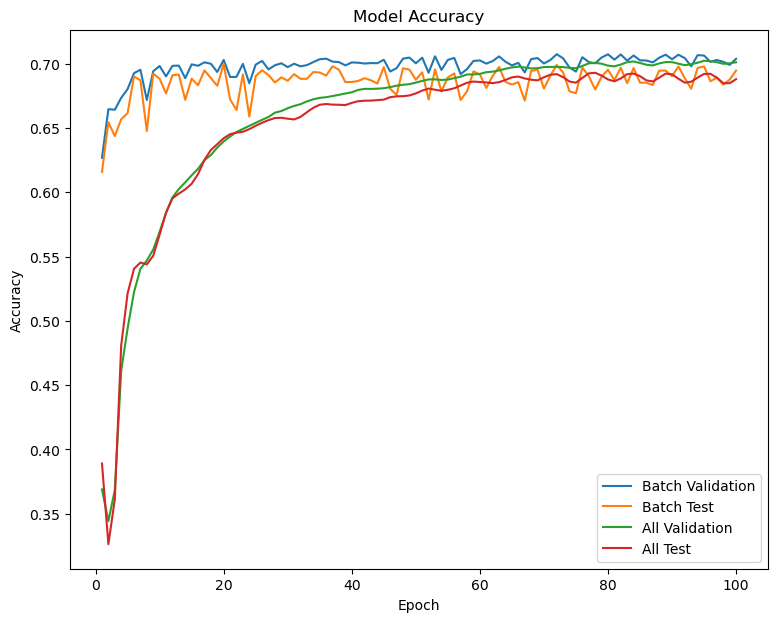

In [80]:
import numpy as np
from matplotlib import pyplot as plt

if 'IS_GRADESCOPE_ENV' not in os.environ:
  batch_results = np.array(batch_results)
  all_results = np.array(all_results)

  x = np.arange(1, 101)

  plt.figure(figsize=(9, 7))

  plt.plot(x, batch_results[:, 1], label="Batch Validation")
  plt.plot(x, batch_results[:, 2], label="Batch Test")
  plt.plot(x, all_results[:, 1], label="All Validation")
  plt.plot(x, all_results[:, 2], label="All Test")
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

# Submission

You will need to submit three files on Gradescope to complete this notebook. 

1.   Your completed *XCS224W_Colab4.ipynb*. From the "File" menu select "Download .ipynb" to save a local copy of your completed Colab. 
2.  *ACM-Node-MeanAgg.csv* 
3.  *ACM-Node-AttentionAgg.csv*
4.  *ogbn-arxiv_batch.csv* 

Download the csv files by selecting the *Folder* icon on the left panel. 

To submit your work, zip the files downloaded in steps 1-3 above and submit to gradescope. **NOTE:** DO NOT rename any of the downloaded files. 